# Import liberares

In [ ]:
!python -m venv ./venv ; . ./venv/bin/activate
!pip -q install git+ https://github.com/huggingface/transformers

!pip install catboost
!pip install xgboost
!pip install -q datasets loralib sentencepiece
!pip -q install bitsandbytes accelerate xformers einops
!pip -q install langchain
!pip install huggingface_hub
!pip install flash-attn
!pip install protobuf

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Lambda, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l1



from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import pprint
import re
import json
import warnings
import ast
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns = None
warnings.filterwarnings("ignore")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" an

# Process Image Features After Generating the Captions Using (florence 2.py)

In [ ]:
!python florence2.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read Caption Data csv File to dataFrame
df = pd.read_csv('/content/drive/MyDrive/DA_final_project_data/caption_data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50165 entries, 0 to 50164
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image_name     50165 non-null  object
 1   appartmentID   50165 non-null  int64 
 2   ImageID        50165 non-null  int64 
 3   Image_captune  50165 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
# lets groupby appartmentID To compine the captions for the same Appartment
ID_description_df = df.groupby('appartmentID')['Image_captune'].apply(lambda text: ' '.join(text)).reset_index()

# rename the concatenated column to 'appartment_description'
ID_description_df.rename(columns={'Image_captune': 'appartment_description'}, inplace=True)
ID_description_df.head()
ID_description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   appartmentID            6116 non-null   int64 
 1   appartment_description  6116 non-null   object
dtypes: int64(1), object(1)
memory usage: 95.7+ KB


In [ ]:
# check a record.
ID_description_df['appartment_description'][0]

'The image shows a modern and minimalistic bedroom with a white desk and a black chair in the center. On the left side of the room, there is a white wooden ladder leaning against the wall with three shelves on top. The shelves are filled with various decorative items such as a vase, a lamp, and a few books. Above the desk, there are three large abstract paintings hanging on the wall. The paintings are in different shades of gray and white, creating a wave-like pattern. The room has a gray sofa with beige cushions and a gray throw pillow on the right side. The floor is made of wood and the walls are painted white. The image shows a modern and minimalistic living room with a white desk and a black chair in the center. On the left side of the desk, there is a black floor lamp with a round white shade. Above the lamp, there are three abstract paintings hanging on the wall. The paintings are in different shades of gray and white, creating a wave-like pattern. The room has hardwood flooring 

In [ ]:
# Save the new DataFrame to a CSV file
ID_description_df.to_csv('appartment_descriptions.csv', index=False)

In [ ]:
# Split the data into 3 parts for to divide the computational resources accordingly.
split_data = np.array_split(ID_description_df,3)

for i, part in enumerate(split_data):
    part.to_csv(f'ID_description_df_{i+1}.csv', index=False)

# Process Image Data After Generating the scores Using (mistral.py)

In [ ]:
!python mistral.py

In [ ]:
# Read row score data
unfiltered_description_1  = pd.read_csv('score_data_1.csv')
unfiltered_description_2 =  pd.read_csv('score_data_3(2).csv')
unfiltered_description = pd.concat([unfiltered_description_1 , unfiltered_description_2], ignore_index=True)
unfiltered_description.head()

pprint.pp(unfiltered_description.Image_scores[917])

(' Here is the JSON output for the provided descriptions:\n'
 '\n'
 '```json\n'
 '{\n'
 '    "Furniture Quality": 7,\n'
 '    "Paint and Wall Finishes": 5,\n'
 '    "Flooring": 6,\n'
 '    "Kitchen and Bathroom Fixtures": 7,\n'
 '    "Lighting": 6,\n'
 '    "Accessories and Décor": 6,\n'
 '    "Outside View": 0,\n'
 '    "Building Façade": 0,\n'
 '    "Outdoor Amenities": 0,\n'
 '    "Landscaping": 0,\n'
 '    "Pool Availability": 0,\n'
 '    "Balcony Availability": 0,\n'
 '    "Architectural Style": 7,\n'
 '    "Natural Light": 6,\n'
 '    "Room Layout and Space Utilization": 6,\n'
 '    "Ceiling Height": 0,\n'
 '    "Quality of Finishes": 6,\n'
 '    "Additional Features": {\n'
 '        "Kitchen Style": 8,\n'
 '        "Living Room Style": 7,\n'
 '        "Dining Area Style": 8\n'
 '    }\n'
 '}\n'
 '```\n'
 '\n'
 'Explanation:\n'
 '\n'
 '1. Furniture Quality: The modern kitchen and office chair have high-quality '
 'materials and\n'
 'designs, while the living room furniture is als

---------------------

In [ ]:
# 1st of all lets get the column of the scores out:
features_series = unfiltered_description.Image_scores
features_series.index = unfiltered_description.appartment_ID
features_series.head(1)

appartment_ID
2595     Here is the evaluation for the provided image...
Name: Image_scores, dtype: object

In [ ]:
# Define a function to extract the first JSON-like dictionary from a string
def extract_first_json_dict(text):
    try:
        # Extract the first '{ }' pattern
        match = re.search(r'\{.*?\}', text, re.DOTALL)
        if match:
            return match.group(0)
    except:
        pass
    return None


# Apply the function to the pandas Series
extracted_jsons = features_series.apply(extract_first_json_dict)

# Filter out None values
extracted_jsons = extracted_jsons.dropna()

# Parse the first JSON string into a dictionary
if not extracted_jsons.empty:
    first_json_dict = json.loads(extracted_jsons[2595])
    print(json.dumps(first_json_dict, indent=4))
else:
    print("No JSON dictionary found.")

{
    "Furniture Quality": 7,
    "Paint and Wall Finishes": 6,
    "Flooring": 6,
    "Kitchen and Bathroom Fixtures": 7,
    "Lighting": 6,
    "Accessories and D\u00e9cor": 6,
    "Outside View": 10,
    "Building Fa\u00e7ade": 0,
    "Outdoor Amenities": 0,
    "Landscaping": 10,
    "Pool Availability": 0,
    "Balcony Availability": 0,
    "Architectural Style": 8,
    "Natural Light": 6,
    "Room Layout and Space Utilization": 7,
    "Ceiling Height": 8,
    "Quality of Finishes": 7,
    "Additional Features - View": 10,
    "Additional Features - Landscaping": 10
}


In [ ]:
# sanity check
print(extracted_jsons[6872])

{
    "Furniture Quality": 6,
    "Paint and Wall Finishes": 5,
    "Flooring": 6,
    "Kitchen and Bathroom Fixtures": 7,
    "Lighting": 6,
    "Accessories and Décor": 5,
    "Outside View": 0,
    "Building Façade": 0,
    "Outdoor Amenities": 0,
    "Landscaping": 0,
    "Pool Availability": 0,
    "Balcony Availability": 0,
    "Architectural Style": 7,
    "Natural Light": 6,
    "Room Layout and Space Utilization": 6,
    "Ceiling Height": 0,
    "Quality of Finishes": 6,
    "Additional Features": {
        "Balcony Type": 6,
        "Balcony Furnishings": 0
    }


---------------

In [ ]:
# Function to parse JSON strings into dictionaries
def parse_json(json_str):
    try:
        return json.loads(json_str)
    except json.JSONDecodeError:
        return None

# Apply the function to the pandas Series
parsed_data = extracted_jsons.apply(parse_json)

# Filter out None values
parsed_data = parsed_data.dropna().reset_index()

# Rename columns for clarity
parsed_data.columns = ['appartment_ID', 'features']

# Convert the 'features' column to separate columns
features_df = pd.json_normalize(parsed_data['features'])

# Merge the 'appartment_ID' column with the features DataFrame
final_df = pd.concat([parsed_data[['appartment_ID']], features_df], axis=1)

final_df.head()

appartment_ID  Furniture Quality  Paint and Wall Finishes  Flooring  \
0           2595                7.0                      6.0       6.0   
1           5136                7.0                      5.0       7.0   
2           6848                7.0                      6.0       7.0   
3           6990                7.0                      6.0       7.0   
4           7064                6.0                      5.0       6.0   

  Kitchen and Bathroom Fixtures Lighting Accessories and Décor Outside View  \
0                             7        6                     6           10   
1                             8        6                     6            0   
2                             8        8                     6            0   
3                             6        7                     6            0   
4                             7        6                     5            0   

  Building Façade Outdoor Amenities Landscaping Pool Availability  \
0               0                 0          10                 0   
1               0                 0           0                 0   
2               0                 0           0                 0   
3               0                 0           0                 0   
4               0                 0           0                 0   

  Balcony Availability Architectural Style Natural Light  \
0                    0                   8             6   
1                    0                   7             7   
2                    0                   7             7   
3                    0                   7             6   
4                    0                   7             6   

  Room Layout and Space Utilization Ceiling Height  Quality of Finishes  \
0                                 7              8                  7.0   
1                                 7              0                  7.0   
2                                 7              0                  7.0   
3                                 6              0                  7.0   
4                                 6              0                  6.0   

   Additional Features - View  Additional Features - Landscaping  \
0                        10.0                               10.0   
1                         NaN                                NaN   
2                         NaN                                NaN   
3                         NaN                                NaN   
4                         NaN                                NaN   

   Additional Features - Bedroom Furniture  \
0                                      NaN   
1                                      7.0   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   Additional Features - Image Quality  Additional Features - Bookshelf  \
0                                  NaN                              NaN   
1                                  5.0                              NaN   
2                                  NaN                              NaN   
3                                  NaN                              NaN   
4                                  NaN                              7.0   

   Additional Features - Glass Vases  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                5.0   

   Additional Features - Kitchen Accessories  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        4.0   

   Additional Features - Bedroom Decor  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                    

In [ ]:
for col in final_df.columns:
    print(col)

appartment_ID
Furniture Quality
Paint and Wall Finishes
Flooring
Kitchen and Bathroom Fixtures
Lighting
Accessories and Décor
Outside View
Building Façade
Outdoor Amenities
Landscaping
Pool Availability
Balcony Availability
Architectural Style
Natural Light
Room Layout and Space Utilization
Ceiling Height
Quality of Finishes
Additional Features - View
Additional Features - Landscaping
Additional Features - Bedroom Furniture
Additional Features - Image Quality
Additional Features - Bookshelf
Additional Features - Glass Vases
Additional Features - Kitchen Accessories
Additional Features - Bedroom Decor
Additional Features - Subject (Man in Selfie)
Additional Features - Artwork Quality
Additional Features - Photo Quality
Additional Features - View from Balcony
Additional Features - Decorative Items
Additional Features - Artwork
Additional Features - Wall Sconce
Additional Features - Photograph
Additional Features - Room Ambiance
Additional Features - Room Atmosphere
Additional Features - 

In [ ]:
final_df.duplicated().sum()

0

In [ ]:
# Calculate the percentage of null values for each column
null_percentage = final_df.isnull().mean() * 100

# Filter columns that have 75% or more null values
columns_to_drop = null_percentage[null_percentage >= 75].index

#print(len(columns_to_drop))
columns_to_drop

Index(['Additional Features - View', 'Additional Features - Landscaping',
       'Additional Features - Bedroom Furniture',
       'Additional Features - Image Quality',
       'Additional Features - Bookshelf', 'Additional Features - Glass Vases',
       'Additional Features - Kitchen Accessories',
       'Additional Features - Bedroom Decor',
       'Additional Features - Subject (Man in Selfie)',
       'Additional Features - Artwork Quality',
       ...
       'Additional Features - Poster Quality',
       'Additional Features - Red Sign Quality',
       'Additional Features - Graffiti',
       'Additional Features - Modern Minimalism',
       'Additional Features - Futuristic',
       'Additional Features - Selfie Frame',
       'Additional Features - Interior Style',
       'Additional Features - Pet-Friendly',
       'Additional Features - Scene Type', 'Additional Features - Typewriter'],
      dtype='object', length=1547)

In [ ]:
# Drop the filtered columns
cleaned_data = final_df.drop(columns=columns_to_drop)

# Display the resulting DataFrame
cleaned_data.head()

appartment_ID  Furniture Quality  Paint and Wall Finishes  Flooring  \
0           2595                7.0                      6.0       6.0   
1           5136                7.0                      5.0       7.0   
2           6848                7.0                      6.0       7.0   
3           6990                7.0                      6.0       7.0   
4           7064                6.0                      5.0       6.0   

  Kitchen and Bathroom Fixtures Lighting Accessories and Décor Outside View  \
0                             7        6                     6           10   
1                             8        6                     6            0   
2                             8        8                     6            0   
3                             6        7                     6            0   
4                             7        6                     5            0   

  Building Façade Outdoor Amenities Landscaping Pool Availability  \
0               0                 0          10                 0   
1               0                 0           0                 0   
2               0                 0           0                 0   
3               0                 0           0                 0   
4               0                 0           0                 0   

  Balcony Availability Architectural Style Natural Light  \
0                    0                   8             6   
1                    0                   7             7   
2                    0                   7             7   
3                    0                   7             6   
4                    0                   7             6   

  Room Layout and Space Utilization Ceiling Height  Quality of Finishes  
0                                 7              8                  7.0  
1                                 7              0                  7.0  
2                                 7              0                  7.0  
3                                 6              0                  7.0  
4                                 6              0                  6.0

In [ ]:
# ass we have Extra Features That is not included on the selected one we will concatenate this on one column
extra_features_df = final_df[columns_to_drop]
extra_features_df.head()
cleaned_data['extras'] = extra_features_df.sum(axis=1)
cleaned_data.head()

appartment_ID  Furniture Quality  Paint and Wall Finishes  Flooring  \
0           2595                7.0                      6.0       6.0   
1           5136                7.0                      5.0       7.0   
2           6848                7.0                      6.0       7.0   
3           6990                7.0                      6.0       7.0   
4           7064                6.0                      5.0       6.0   

  Kitchen and Bathroom Fixtures Lighting Accessories and Décor Outside View  \
0                             7        6                     6           10   
1                             8        6                     6            0   
2                             8        8                     6            0   
3                             6        7                     6            0   
4                             7        6                     5            0   

  Building Façade Outdoor Amenities Landscaping Pool Availability  \
0               0                 0          10                 0   
1               0                 0           0                 0   
2               0                 0           0                 0   
3               0                 0           0                 0   
4               0                 0           0                 0   

  Balcony Availability Architectural Style Natural Light  \
0                    0                   8             6   
1                    0                   7             7   
2                    0                   7             7   
3                    0                   7             6   
4                    0                   7             6   

  Room Layout and Space Utilization Ceiling Height  Quality of Finishes  \
0                                 7              8                  7.0   
1                                 7              0                  7.0   
2                                 7              0                  7.0   
3                                 6              0                  7.0   
4                                 6              0                  6.0   

   extras  
0    20.0  
1    12.0  
2     0.0  
3     0.0  
4    16.0

In [ ]:
# Convert all object columns to float64
for col in cleaned_data.select_dtypes(include='object').columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   appartment_ID                      2447 non-null   int64  
 1   Furniture Quality                  2418 non-null   float64
 2   Paint and Wall Finishes            2421 non-null   float64
 3   Flooring                           2421 non-null   float64
 4   Kitchen and Bathroom Fixtures      2420 non-null   float64
 5   Lighting                           2421 non-null   float64
 6   Accessories and Décor              2420 non-null   float64
 7   Outside View                       2439 non-null   float64
 8   Building Façade                    2432 non-null   float64
 9   Outdoor Amenities                  2430 non-null   float64
 10  Landscaping                        2433 non-null   float64
 11  Pool Availability                  2425 non-null   float

In [ ]:
# Fill null values with 0 as null represents the feature is not existing
cleaned_data.fillna(0, inplace=True)
print(cleaned_data.isnull().sum())

appartment_ID                        0
Furniture Quality                    0
Paint and Wall Finishes              0
Flooring                             0
Kitchen and Bathroom Fixtures        0
Lighting                             0
Accessories and Décor                0
Outside View                         0
Building Façade                      0
Outdoor Amenities                    0
Landscaping                          0
Pool Availability                    0
Balcony Availability                 0
Architectural Style                  0
Natural Light                        0
Room Layout and Space Utilization    0
Ceiling Height                       0
Quality of Finishes                  0
extras                               0
dtype: int64


-----------

## Read Price from calendar data file

In [ ]:
calender = pd.read_csv('/content/drive/MyDrive/DA_final_project_data/calendar.csv')
calender.head()

listing_id       date available     price  adjusted_price  minimum_nights  \
0        2595   7/6/2024         t  $225.00              NaN            30.0   
1        2595   7/7/2024         t  $225.00              NaN            30.0   
2        2595   7/8/2024         t  $225.00              NaN            30.0   
3        2595   7/9/2024         t  $225.00              NaN            30.0   
4        2595  7/10/2024         t  $225.00              NaN            30.0   

   maximum_nights  
0          1125.0  
1          1125.0  
2          1125.0  
3          1125.0  
4          1125.0

In [ ]:
# Keep price and listing id only
calender.drop(columns=['date','adjusted_price','available','minimum_nights','maximum_nights'],inplace=True)
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1048575 non-null  int64 
 1   price       1048575 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [ ]:
# drop null values
calender.drop_duplicates(inplace=True)
print(calender.duplicated().sum())

0


In [ ]:
# proces price to convert it to numper
calender['price']= calender['price'].str.replace('$', '').str.replace(',', '').astype(float)
calender.head()

listing_id  price
0           2595  225.0
365         5136  253.0
730         6848   89.0
1095        6872   75.0
1460        6990   70.0

------------------

In [ ]:
# merge price to be part of cleaned data.
# Merge cleaned_data with calendar on appartment_ID and listing_id
merged_data = pd.merge(cleaned_data, calender,
                       left_on='appartment_ID', right_on='listing_id', how='left')

# Drop the redundant listing_id column
merged_data = merged_data.drop(columns=['listing_id'])
merged_data.head()

appartment_ID  Furniture Quality  Paint and Wall Finishes  Flooring  \
0           2595                7.0                      6.0       6.0   
1           5136                7.0                      5.0       7.0   
2           6848                7.0                      6.0       7.0   
3           6990                7.0                      6.0       7.0   
4           7064                6.0                      5.0       6.0   

   Kitchen and Bathroom Fixtures  Lighting  Accessories and Décor  \
0                            7.0       6.0                    6.0   
1                            8.0       6.0                    6.0   
2                            8.0       8.0                    6.0   
3                            6.0       7.0                    6.0   
4                            7.0       6.0                    5.0   

   Outside View  Building Façade  Outdoor Amenities  Landscaping  \
0          10.0              0.0                0.0         10.0   
1           0.0              0.0                0.0          0.0   
2           0.0              0.0                0.0          0.0   
3           0.0              0.0                0.0          0.0   
4           0.0              0.0                0.0          0.0   

   Pool Availability  Balcony Availability  Architectural Style  \
0                0.0                   0.0                  8.0   
1                0.0                   0.0                  7.0   
2                0.0                   0.0                  7.0   
3                0.0                   0.0                  7.0   
4                0.0                   0.0                  7.0   

   Natural Light  Room Layout and Space Utilization  Ceiling Height  \
0            6.0                                7.0             8.0   
1            7.0                                7.0             0.0   
2            7.0                                7.0             0.0   
3            6.0                                6.0             0.0   
4            6.0                                6.0             0.0   

   Quality of Finishes  extras  price  
0                  7.0    20.0  225.0  
1                  7.0    12.0  253.0  
2                  7.0     0.0   89.0  
3                  7.0     0.0   70.0  
4                  6.0    16.0  150.0

In [ ]:
# Remove the NaNs
merged_data.dropna(inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1637 entries, 0 to 1636
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   appartment_ID                      1637 non-null   int64  
 1   Furniture Quality                  1637 non-null   float64
 2   Paint and Wall Finishes            1637 non-null   float64
 3   Flooring                           1637 non-null   float64
 4   Kitchen and Bathroom Fixtures      1637 non-null   float64
 5   Lighting                           1637 non-null   float64
 6   Accessories and Décor              1637 non-null   float64
 7   Outside View                       1637 non-null   float64
 8   Building Façade                    1637 non-null   float64
 9   Outdoor Amenities                  1637 non-null   float64
 10  Landscaping                        1637 non-null   float64
 11  Pool Availability                  1637 non-null   float64
 1

-------------

# Process Tabular listing Data

In [ ]:
listing = pd.read_csv('listings.csv')
print(listing.shape)
listing.head()

(37765, 75)


id                        listing_url     scrape_id last_scraped  \
0  2595.0  https://www.airbnb.com/rooms/2595  2.024070e+13     7/6/2024   
1  5136.0  https://www.airbnb.com/rooms/5136  2.024070e+13     7/5/2024   
2  6848.0  https://www.airbnb.com/rooms/6848  2.024070e+13     7/6/2024   
3  6872.0  https://www.airbnb.com/rooms/6872  2.024070e+13     7/5/2024   
4  6990.0  https://www.airbnb.com/rooms/6990  2.024070e+13     7/6/2024   

        source                                               name  \
0  city scrape                              Skylit Midtown Castle   
1  city scrape    Spacious Family Friendly Duplex w/ Patio + Yard   
2  city scrape                   Only 2 stops to Manhattan studio   
3  city scrape  Uptown Sanctuary w/ Private Bath (Month to Month)   
4  city scrape                            UES Beautiful Blue Room   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  We welcome you to stay in our lovely 2 br, 130...   
2  Comfortable studio apartment with super comfor...   
3  A charming month-to-month home away from home ...   
4                    Beautiful peaceful healthy home   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1                                                NaN   
2                                                NaN   
3  This sweet Harlem sanctuary is a 10-20 minute ...   
4  Location: Five minutes to Central Park, Museum...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/miso/Hosting-...     2845   
1  https://a0.muscache.com/pictures/miso/Hosting-...     7378   
2  https://a0.muscache.com/pictures/e4f031a7-f146...    15991   
3  https://a0.muscache.com/pictures/miso/Hosting-...    16104   
4  https://a0.muscache.com/pictures/be6cd5b3-9295...    16800   

                                  host_url      host_name host_since  \
0   https://www.airbnb.com/users/show/2845       Jennifer   9/9/2008   
1   https://www.airbnb.com/users/show/7378        Rebecca   2/3/2009   
2  https://www.airbnb.com/users/show/15991  Allen & Irina   5/6/2009   
3  https://www.airbnb.com/users/show/16104            Kae   5/7/2009   
4  https://www.airbnb.com/users/show/16800            Cyn  5/12/2009   

   host_location                                         host_about  \
0  Woodstock, NY  A New Yorker since 2000! My passion is creatin...   
1   New York, NY  Rebecca is an artist/designer, and Henoch is i...   
2   New York, NY  We love to travel. When we travel we like to s...   
3   New York, NY  A former life in fashion and wellness has left...   
4   New York, NY  Capturing the Steinbeck side of life in its Fi...   

   host_response_time host_response_rate host_acceptance_rate  \
0  a few days or more                43%                  21%   
1      within an hour               100%                 100%   
2      within an hour               100%                 100%   
3        within a day                50%                   0%   
4      within an hour               100%                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/user/50fc5...   
1                 f  https://a0.muscache.com/im/users/7378/profile_...   
2                 t  https://a0.muscache.com/im/users/15991/profile...   
3                 f  https://a0.muscache.com/im/pictures/user/d865a...   
4                 t  https://a0.muscache.com/im/pictures/user/17c4d...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/50fc5...            Midtown   
1  https://a0.muscache.com/im/users/7378/profile_...  Greenwood Heights   
2  https://a0.muscache.com/im/users/15991/profile...       Williamsburg   
3  https://a0.muscache.com/im/pictures/user/d865a...        East Harlem   
4  ht

----------------

In [ ]:
# Merge the DataFrames on listing_id (or id in listings DataFrame)
master_df = pd.merge(merged_data, listing, left_on='appartment_ID', right_on='id',
                     how='left')
# Drop unnecessary columns
master_df = master_df.drop(columns=['id'])
master_df.head(2)

appartment_ID  Furniture Quality  Paint and Wall Finishes  Flooring  \
0           2595                7.0                      6.0       6.0   
1           5136                7.0                      5.0       7.0   

   Kitchen and Bathroom Fixtures  Lighting  Accessories and Décor  \
0                            7.0       6.0                    6.0   
1                            8.0       6.0                    6.0   

   Outside View  Building Façade  Outdoor Amenities  Landscaping  \
0          10.0              0.0                0.0         10.0   
1           0.0              0.0                0.0          0.0   

   Pool Availability  Balcony Availability  Architectural Style  \
0                0.0                   0.0                  8.0   
1                0.0                   0.0                  7.0   

   Natural Light  Room Layout and Space Utilization  Ceiling Height  \
0            6.0                                7.0             8.0   
1            7.0                                7.0             0.0   

   Quality of Finishes  extras  price_x                        listing_url  \
0                  7.0    20.0    225.0  https://www.airbnb.com/rooms/2595   
1                  7.0    12.0    253.0  https://www.airbnb.com/rooms/5136   

      scrape_id last_scraped       source  \
0  2.024070e+13     7/6/2024  city scrape   
1  2.024070e+13     7/5/2024  city scrape   

                                              name  \
0                            Skylit Midtown Castle   
1  Spacious Family Friendly Duplex w/ Patio + Yard   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  We welcome you to stay in our lovely 2 br, 130...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/miso/Hosting-...     2845   
1  https://a0.muscache.com/pictures/miso/Hosting-...     7378   

                                 host_url host_name host_since  host_location  \
0  https://www.airbnb.com/users/show/2845  Jennifer   9/9/2008  Woodstock, NY   
1  https://www.airbnb.com/users/show/7378   Rebecca   2/3/2009   New York, NY   

                                          host_about  host_response_time  \
0  A New Yorker since 2000! My passion is creatin...  a few days or more   
1  Rebecca is an artist/designer, and Henoch is i...      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                43%                  21%                 f   
1               100%                 100%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/50fc5...   
1  https://a0.muscache.com/im/users/7378/profile_...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/50fc5...            Midtown   
1  https://a0.muscache.com/im/users/7378/profile_...  Greenwood Heights   

   host_listings_count  host_total_listings_count  \
0                  7.0                        9.0   
1                  1.0                        5.0   

                 host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'work_email']                    t   
1                ['email', 'phone']                    t   

  host_identity_verified            neighbourhood neighbourhood_cleansed  \
0                      t  Neighborhood highlights                Midtown   
1                      t                      NaN            Sunset Park   

  neighbourhood_group_cleansed  latitude  longitude       property_type  \
0                    Manhattan  40.75356  -73.98559  Entire rental unit   
1                     Brooklyn  40.66265  -73.99454  Entire rental unit   

         room_type  accommoda

In [ ]:
print(master_df.shape)

(1637, 94)


In [ ]:
# Print Numper of Null values for each feature
master_df.isnull().sum().sort_values(ascending=False)

calendar_updated          1637
license                   1542
host_response_time         878
host_response_rate         878
host_acceptance_rate       830
                          ... 
host_id                      0
picture_url                  0
name                         0
source                       0
neighbourhood_cleansed       0
Length: 94, dtype: int64

In [ ]:
# categorical columns that have no influence in our Target.
master_df = master_df.drop(columns=['listing_url','last_scraped', 'source', 'name','latitude' , 'longitude','scrape_id','host_id','calendar_updated',"license",
       'description', 'neighborhood_overview', 'picture_url','host_url', 'host_name', 'host_since', 'host_location', 'host_about','host_url'
       , 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications', 'neighbourhood', 'neighbourhood_group_cleansed',
          'bathrooms_text','calendar_last_scraped', 'first_review', 'last_review','price_y','host_thumbnail_url','host_picture_url'])

master_df.rename(columns={'price_x': 'price'}, inplace=True)
master_df.head()

print(master_df.shape)
print(master_df.info())

(1637, 66)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   appartment_ID                                 1637 non-null   int64  
 1   Furniture Quality                             1637 non-null   float64
 2   Paint and Wall Finishes                       1637 non-null   float64
 3   Flooring                                      1637 non-null   float64
 4   Kitchen and Bathroom Fixtures                 1637 non-null   float64
 5   Lighting                                      1637 non-null   float64
 6   Accessories and Décor                         1637 non-null   float64
 7   Outside View                                  1637 non-null   float64
 8   Building Façade                               1637 non-null   float64
 9   Outdoor Amenities                             1637 n

In [ ]:
def process_features(df, column_name='amenities', threshold=0.25):
    # Convert string representation of list to actual list
    df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Get all unique features
    all_features = set()
    for feature_list in df[column_name]:
        if isinstance(feature_list, list):
            all_features.update(feature_list)

    # Create new columns for each feature
    for feature in all_features:
        df[f"{column_name}_{feature}"] = df[column_name].apply(lambda x: 1 if isinstance(x, list) and feature in x else 0)

    # Calculate the frequency of each feature
    feature_cols = [f"{column_name}_{feature}" for feature in all_features]
    feature_freq = df[feature_cols].mean()

    # Keep only features that appear in at least 25% of the samples
    features_to_keep = feature_freq[feature_freq >= threshold].index.tolist()

    # Drop the features that don't meet the threshold
    features_to_drop = set(feature_cols) - set(features_to_keep)
    df = df.drop(columns=features_to_drop)

    # Drop the original column
    df = df.drop(column_name, axis=1)

    return df

def preprocess_data(df):
    # Handle percentage columns
    percentage_columns = ['host_response_rate', 'host_acceptance_rate']
    for col in percentage_columns:
        df[col] = pd.to_numeric(df[col].str.rstrip('%'), errors='coerce') / 100.0

    # Handle boolean columns and any other columns with true/false values
    for col in df.columns:
        if df[col].dtype == 'object':
            unique_values = df[col].unique()
            if set(unique_values) == {'t', 'f'} or set(unique_values) == {'true', 'false'}:
                df[col] = df[col].map({'t': 1, 'f': 0, 'true': 1, 'false': 0})

    # Label encoding for host_response_time
    le = LabelEncoder()
    df['host_response_time'] = le.fit_transform(df['host_response_time'].astype(str))

    # One-hot encoding for categorical columns
    categorical_columns = ['host_neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type']
    for col in categorical_columns:
        one_hot = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, one_hot], axis=1)
        df.drop(col, axis=1, inplace=True)

    # Process amenities column
    df = process_features(df, column_name='amenities', threshold=0.25)

    # Convert all columns to numeric, replacing non-numeric values with NaN
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop any feature that appears in less than 25% of the samples
    feature_freq = df.mean()
    features_to_keep = feature_freq[feature_freq >= 0.25].index.tolist()
    df = df[features_to_keep]

    return df


# Apply preprocessing
df_processed = preprocess_data(master_df.copy())
df_processed.fillna(0,inplace=True)
df_processed.head()


appartment_ID  Furniture Quality  Paint and Wall Finishes  Flooring  \
0           2595                7.0                      6.0       6.0   
1           5136                7.0                      5.0       7.0   
2           6848                7.0                      6.0       7.0   
3           6990                7.0                      6.0       7.0   
4           7064                6.0                      5.0       6.0   

   Kitchen and Bathroom Fixtures  Lighting  Accessories and Décor  \
0                            7.0       6.0                    6.0   
1                            8.0       6.0                    6.0   
2                            8.0       8.0                    6.0   
3                            6.0       7.0                    6.0   
4                            7.0       6.0                    5.0   

   Outside View  Building Façade  Landscaping  Balcony Availability  \
0          10.0              0.0         10.0                   0.0   
1           0.0              0.0          0.0                   0.0   
2           0.0              0.0          0.0                   0.0   
3           0.0              0.0          0.0                   0.0   
4           0.0              0.0          0.0                   0.0   

   Architectural Style  Natural Light  Room Layout and Space Utilization  \
0                  8.0            6.0                                7.0   
1                  7.0            7.0                                7.0   
2                  7.0            7.0                                7.0   
3                  7.0            6.0                                6.0   
4                  7.0            6.0                                6.0   

   Ceiling Height  Quality of Finishes  extras  price  host_response_time  \
0             8.0                  7.0    20.0  225.0                   0   
1             0.0                  7.0    12.0  253.0                   4   
2             0.0                  7.0     0.0   89.0                   4   
3             0.0                  7.0     0.0   70.0                   4   
4             0.0                  6.0    16.0  150.0                   0   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0                0.43                  0.21                  7.0   
1                1.00                  1.00                  1.0   
2                1.00                  1.00                  1.0   
3                1.00                  1.00                  1.0   
4                0.00                  0.00                  2.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        9.0                     1                       1   
1                        5.0                     1                       1   
2                        1.0                     1                       1   
3                        6.0                     1                       1   
4                        2.0                     1                       1   

   accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
0             1        1.0       0.0   1.0              30            1125   
1             4        1.5       2.0   2.0              30             730   
2             3        1.0       2.0   1.0              30             730   
3             1        1.0       1.0   1.0              30             365   
4             2        0.0       1.0   0.0              30              45   

   minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
0                    30.0                    30.0                  1125.0   
1                    30.0                    30.0                   730.0   
2                    30.0                    30.0                  1125.0   
3                    30.0                    30.0                   365.0   
4                    30.0                    30.0               

In [ ]:
master_df = df_processed.copy()

## Multicollinearity Check

In [ ]:
# Drop identifier and target variable columns
X = master_df.drop(columns=['appartment_ID', 'price'])

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numerical = X[numerical_cols]

# Impute numerical features with the mean (if not done already)
numerical_imputer = SimpleImputer(strategy='mean')
X_numerical = numerical_imputer.fit_transform(X_numerical)

# Convert the numpy array back to a DataFrame to keep track of feature names
X_numerical = pd.DataFrame(X_numerical, columns=numerical_cols)

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(len(X_numerical.columns))]

vif_data

feature        VIF
0               Furniture Quality  35.388221
1         Paint and Wall Finishes  42.499953
2                        Flooring  51.169992
3   Kitchen and Bathroom Fixtures   3.374775
4                        Lighting  32.029066
..                            ...        ...
79                 amenities_Oven   6.360949
80              amenities_Kitchen  19.554157
81  amenities_Dedicated workspace   2.868023
82         amenities_Coffee maker   3.669646
83         amenities_Refrigerator   9.928959

[84 rows x 2 columns]

In [ ]:
Image_features = ['Furniture Quality', 'Paint and Wall Finishes',
       'Flooring', 'Kitchen and Bathroom Fixtures', 'Lighting',
       'Accessories and Décor', 'Outside View', 'Building Façade', 'Landscaping',
       'Balcony Availability', 'Architectural Style', 'Natural Light',
       'Room Layout and Space Utilization', 'Ceiling Height',
       'Quality of Finishes', 'extras']

## Correlation Check.

In [ ]:
# Identify numerical features
numerical_features = master_df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame with only numerical features
numerical_df = master_df[numerical_features]

# Compute the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Extract the correlation of each feature with the target variable 'price'
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Display the correlations
correlation_with_price.nlargest(15)

price                               1.000000
accommodates                        0.468281
bedrooms                            0.370249
beds                                0.195130
amenities_TV with standard cable    0.175832
bathrooms                           0.174169
amenities_Elevator                  0.132951
amenities_Dryer                     0.120384
amenities_Washer                    0.118059
maximum_nights                      0.089130
availability_30                     0.078915
Outside View                        0.073796
Ceiling Height                      0.065702
maximum_maximum_nights              0.064143
maximum_nights_avg_ntm              0.064137
Name: price, dtype: float64

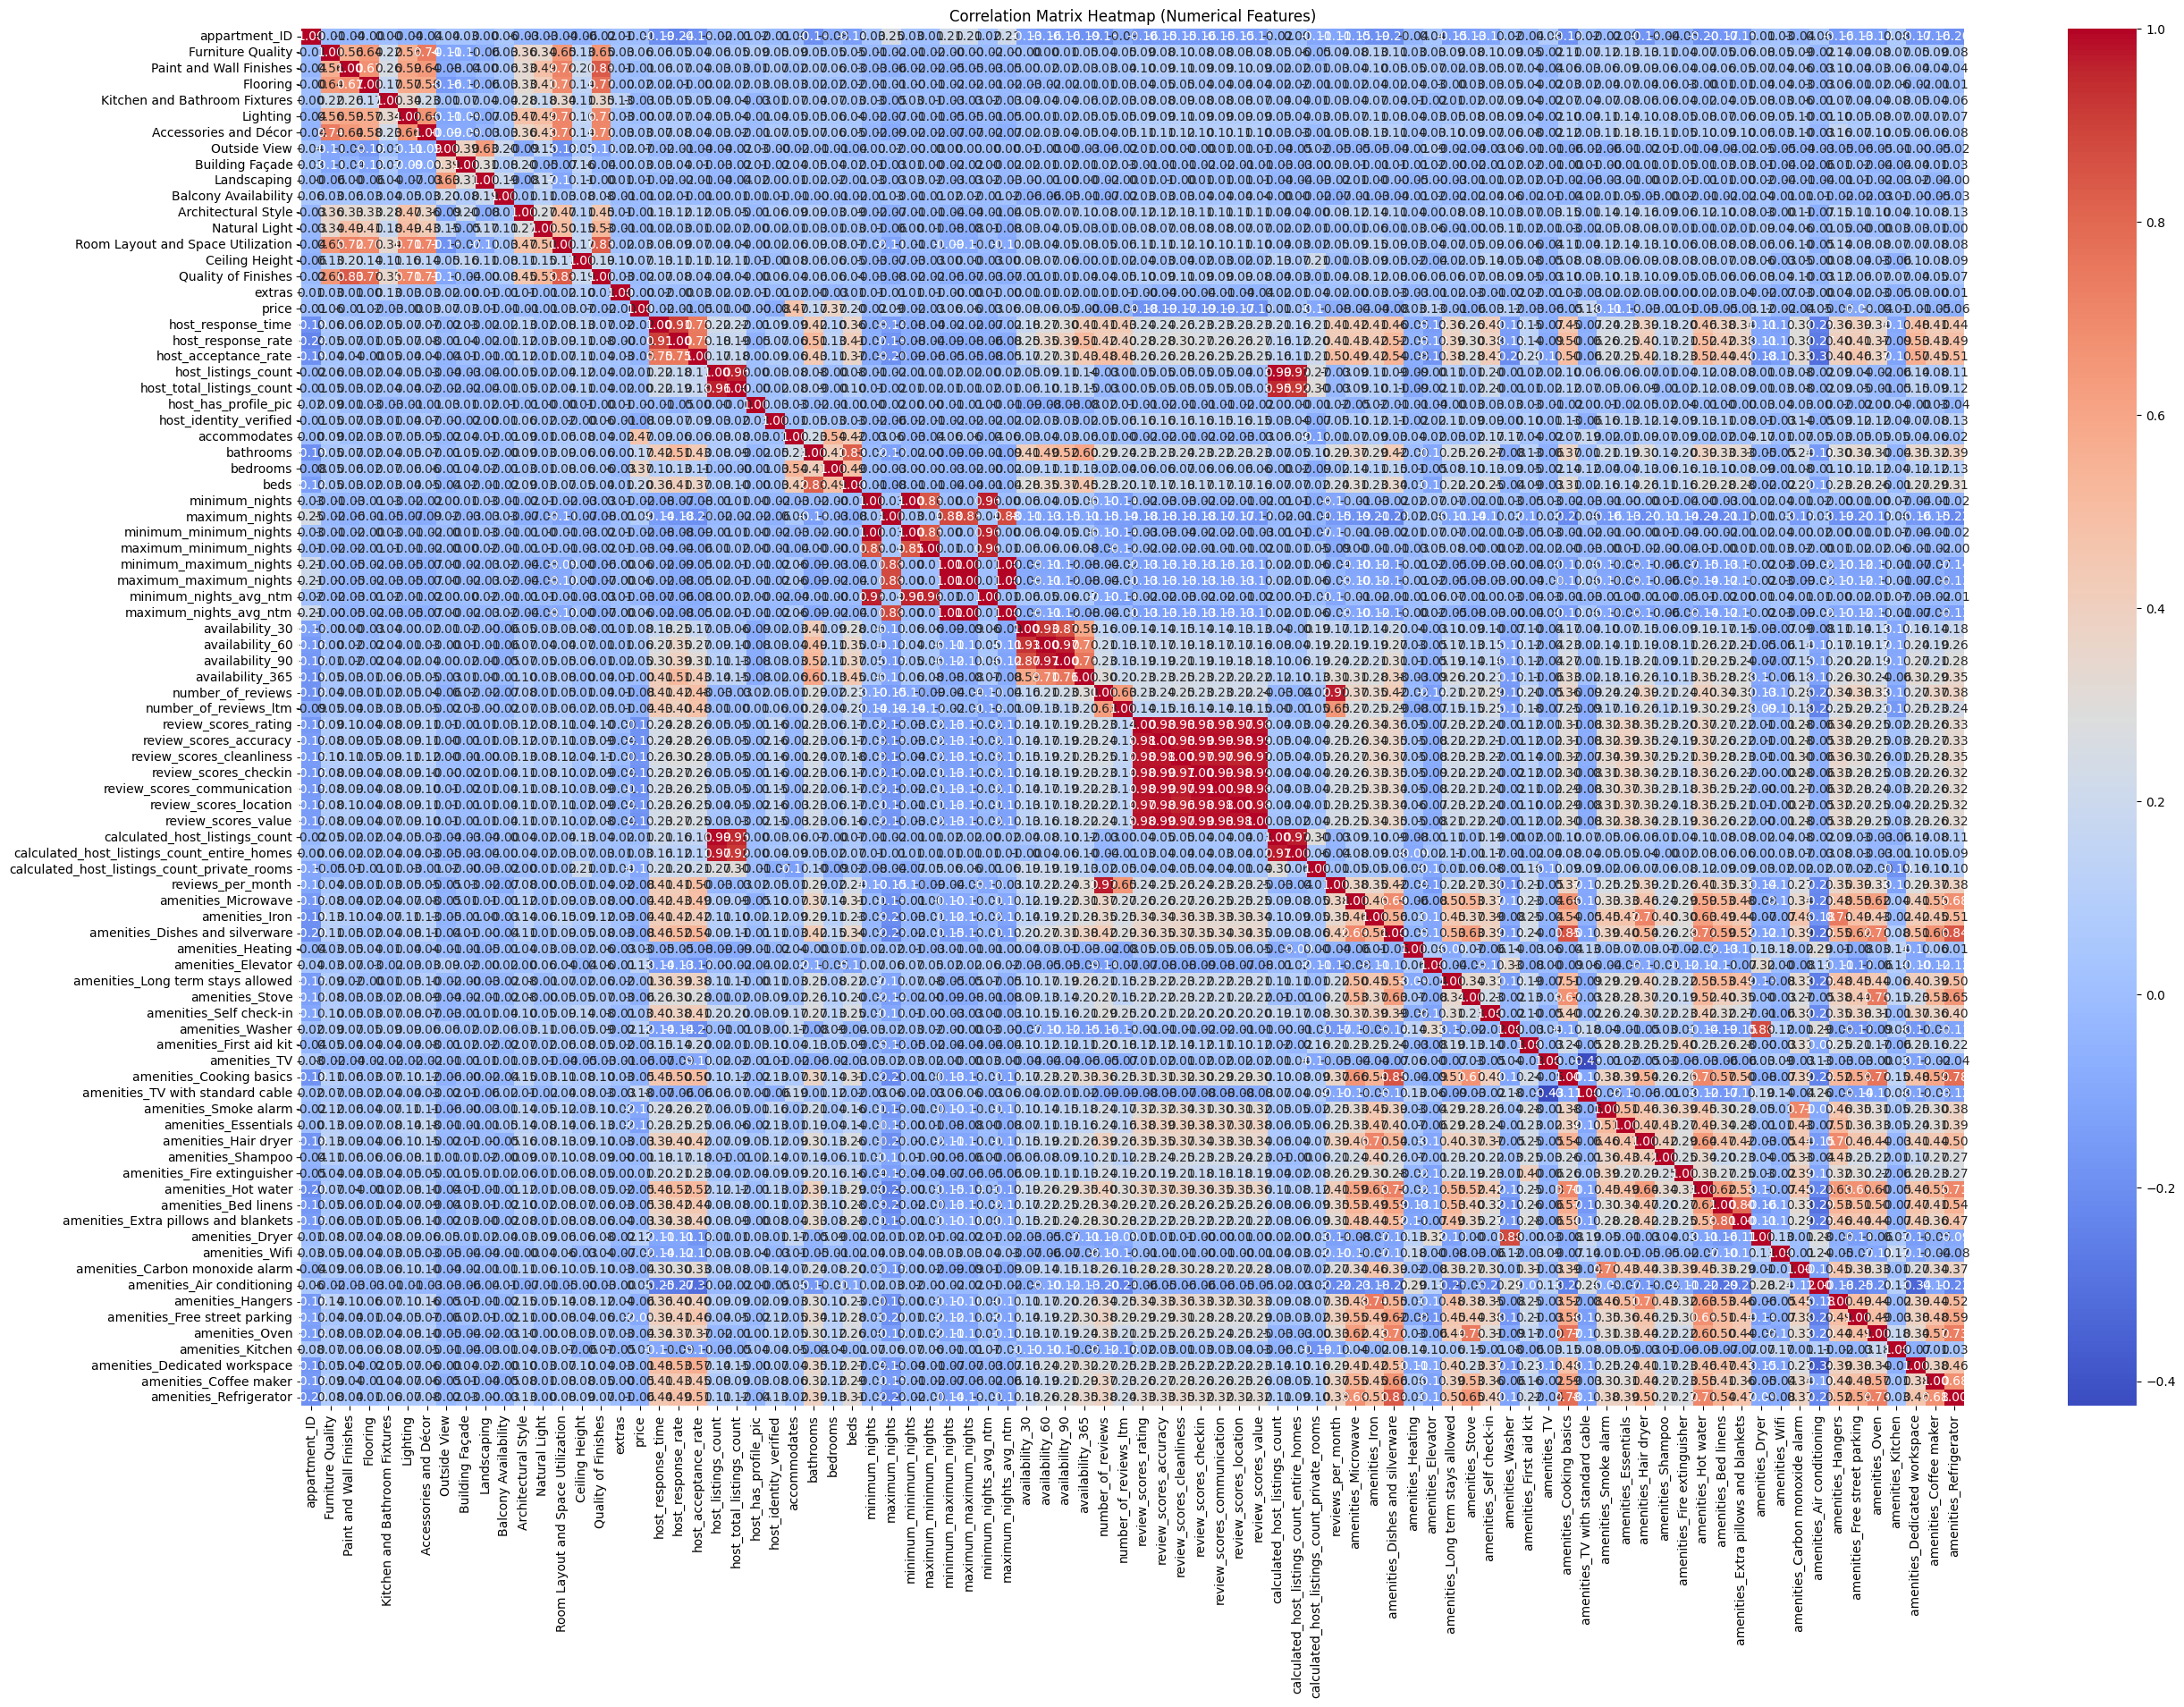

In [ ]:
# Generate a heatmap to visualize correlations
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Numerical Features)');

# Regression Anaysis.

- Without image-extracted features

In [ ]:
# Select only the numerical features
numerical_df = master_df.drop(columns=Image_features).select_dtypes(include=['int64', 'float64'])

# Ensure the target variable 'price' is numerical
numerical_df['price'] = pd.to_numeric(master_df['price'], errors='coerce')

# Separate the features (X) and the target variable (y)
X = numerical_df.drop('price', axis=1)
X = sm.add_constant(X)  # Add a constant term for the intercept
y = numerical_df['price']

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     12.97
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          1.54e-109
Time:                        22:29:56   Log-Likelihood:                -10992.
No. Observations:                1637   AIC:                         2.212e+04
Df Residuals:                    1567   BIC:                         2.250e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

- With image-extracted features.

In [ ]:
# Select only the numerical features
numerical_df = master_df.drop(columns=['appartment_ID']).select_dtypes(include=['int64', 'float64'])

# Ensure the target variable 'price' is numerical
numerical_df['price'] = pd.to_numeric(master_df['price'], errors='coerce')

# Separate the features (X) and the target variable (y)
X = numerical_df.drop('price', axis=1)
X = sm.add_constant(X)  # Add a constant term for the intercept
y = numerical_df['price']

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     11.41
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          2.01e-110
Time:                        22:30:02   Log-Likelihood:                -10968.
No. Observations:                1637   AIC:                         2.211e+04
Df Residuals:                    1552   BIC:                         2.257e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
pprint.pp(Image_features)

['Furniture Quality',
 'Paint and Wall Finishes',
 'Flooring',
 'Kitchen and Bathroom Fixtures',
 'Lighting',
 'Accessories and Décor',
 'Outside View',
 'Building Façade',
 'Landscaping',
 'Balcony Availability',
 'Architectural Style',
 'Natural Light',
 'Room Layout and Space Utilization',
 'Ceiling Height',
 'Quality of Finishes',
 'extras']


# Modeling

## CatBoost

In [ ]:
# Separate the features and target variable
X = master_df.drop(columns=['appartment_ID','price'])
y = master_df['price']
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)
print(X.isnull().sum().sum())


0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize CatBoost regressor
model = CatBoostRegressor(iterations=1000,learning_rate=0.01,
                          depth=6,
                          eval_metric='RMSE',
                          verbose=1)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

0:	learn: 247.3310066	test: 259.8638153	best: 259.8638153 (0)	total: 52.1ms	remaining: 52s
1:	learn: 246.8390693	test: 259.7367150	best: 259.7367150 (1)	total: 57.1ms	remaining: 28.5s
2:	learn: 246.3628222	test: 259.5800346	best: 259.5800346 (2)	total: 61.7ms	remaining: 20.5s
3:	learn: 246.0319627	test: 259.5290343	best: 259.5290343 (3)	total: 66.3ms	remaining: 16.5s
4:	learn: 245.7722481	test: 259.5226356	best: 259.5226356 (4)	total: 71.2ms	remaining: 14.2s
5:	learn: 245.5150357	test: 259.5119578	best: 259.5119578 (5)	total: 75.6ms	remaining: 12.5s
6:	learn: 245.1050442	test: 259.4088243	best: 259.4088243 (6)	total: 80.2ms	remaining: 11.4s
7:	learn: 244.8331172	test: 259.3630549	best: 259.3630549 (7)	total: 84.8ms	remaining: 10.5s
8:	learn: 244.3417475	test: 259.0607916	best: 259.0607916 (8)	total: 89.3ms	remaining: 9.84s
9:	learn: 244.0247338	test: 259.0410585	best: 259.0410585 (9)	total: 94ms	remaining: 9.31s
10:	learn: 243.6328719	test: 258.9502624	best: 258.9502624 (10)	total: 98.

## XGboost

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize XGBoost regressor
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    eval_metric='rmse',
    early_stopping_rounds=50,
    verbosity=1
)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")


[0]	validation_0-rmse:253.81096
[1]	validation_0-rmse:250.38806
[2]	validation_0-rmse:248.42669
[3]	validation_0-rmse:247.55242
[4]	validation_0-rmse:244.62373
[5]	validation_0-rmse:244.48719
[6]	validation_0-rmse:241.85772
[7]	validation_0-rmse:243.70124
[8]	validation_0-rmse:244.10341
[9]	validation_0-rmse:246.34448
[10]	validation_0-rmse:246.44783
[11]	validation_0-rmse:246.70039
[12]	validation_0-rmse:247.03562
[13]	validation_0-rmse:247.50255
[14]	validation_0-rmse:248.27519
[15]	validation_0-rmse:250.18404
[16]	validation_0-rmse:251.72337
[17]	validation_0-rmse:254.60905
[18]	validation_0-rmse:256.15805
[19]	validation_0-rmse:258.56731
[20]	validation_0-rmse:260.33826
[21]	validation_0-rmse:262.13682
[22]	validation_0-rmse:264.50141
[23]	validation_0-rmse:265.88815
[24]	validation_0-rmse:267.83266
[25]	validation_0-rmse:269.90071
[26]	validation_0-rmse:271.46561
[27]	validation_0-rmse:272.44473
[28]	validation_0-rmse:273.85081
[29]	validation_0-rmse:275.26356
[30]	validation_0-rm

## Random Forest

###  Model Without Images Features


In [ ]:
X_with_images = X.copy()
X_without_images = X.drop(columns=Image_features)

In [ ]:
X_with_images.head(1)

Furniture Quality  Paint and Wall Finishes  Flooring  \
0                7.0                      6.0       6.0   

   Kitchen and Bathroom Fixtures  Lighting  Accessories and Décor  \
0                            7.0       6.0                    6.0   

   Outside View  Building Façade  Landscaping  Balcony Availability  \
0          10.0              0.0         10.0                   0.0   

   Architectural Style  Natural Light  Room Layout and Space Utilization  \
0                  8.0            6.0                                7.0   

   Ceiling Height  Quality of Finishes  extras  host_response_time  \
0             8.0                  7.0    20.0                   0   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0                0.43                  0.21                  7.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        9.0                     1                       1   

   accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
0             1        1.0       0.0   1.0              30            1125   

   minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
0                    30.0                    30.0                  1125.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                  1125.0                    30.0                  1125.0   

   availability_30  availability_60  availability_90  availability_365  \
0               13               30               60               300   

   number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
0                 49                      0                  4.68   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.73                       4.63                   4.77   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          4.8                    4.81                  4.4   

   calculated_host_listings_count  \
0                               3   

   calculated_host_listings_count_entire_homes  \
0                                            3   

   calculated_host_listings_count_private_rooms  reviews_per_month  \
0                                             0               0.28   

   property_type_Entire rental unit  \
0                                 1   

   property_type_Private room in rental unit  room_type_Entire home/apt  \
0                                          0                          1   

   room_type_Private room  amenities_Microwave  amenities_Iron  \
0                       0                    0               1   

   amenities_Dishes and silverware  amenities_Heating  amenities_Elevator  \
0                                1                  1                   0   

   amenities_Long term stays allowed  amenities_Stove  \
0                                  1                1   

   amenities_Self check-in  amenities_Washer  amenities_First aid kit  \
0                        1                 0                        0   

   amenities_TV  amenities_Cooking basics  amenities_TV with standard cable  \
0             1                         1                                 0   

   amenities_Smoke alarm  amenities_Essentials  amenities_Hair dryer  \
0                      1                     1                     1   

   amenities_Shampoo  amenities_Fire extinguisher  amenities_Hot water  \
0                  0                            1                    1   

   amenities_Bed linens  amenities_Extra pillows and blankets  \
0                     1                                     1   

   amenities_Dryer  amenities_Wifi  amenities_Carbon monoxide alarm  \
0                0               1                                1   

   amenities_Air conditioning  amenities_Hangers  \
0                           1                  1   

   amenities

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_without_images, y, test_size=0.3, random_state=1)
best_random = RandomForestRegressor(bootstrap=True, criterion='friedman_mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
best_random.fit(X_train, y_train)
y_train_rfr = best_random.predict(X_train)
y_test_rfr = best_random.predict(X_test)
rfr_best_results = pd.DataFrame({'algorithm':['Random Forest Regressor'],

            'training error': [mean_squared_error(y_train, y_train_rfr)],
            'test error': [mean_squared_error(y_test, y_test_rfr)],
            'training_r2_score': [r2_score(y_train, y_train_rfr)],
            'test_r2_score': [r2_score(y_test, y_test_rfr)]})
rfr_best_results

algorithm  training error   test error  training_r2_score  \
0  Random Forest Regressor    13506.327409  32410.84814           0.791947   

   test_r2_score  
0       0.430231

### Model With Images Features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_with_images, y, test_size=0.3, random_state=1)
best_random = RandomForestRegressor(bootstrap=True, criterion='friedman_mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
best_random.fit(X_train, y_train)
y_train_rfr = best_random.predict(X_train)
y_test_rfr = best_random.predict(X_test)
rfr_best_results = pd.DataFrame({'algorithm':['Random Forest Regressor'],

            'training error': [mean_squared_error(y_train, y_train_rfr)],
            'test error': [mean_squared_error(y_test, y_test_rfr)],
            'training_r2_score': [r2_score(y_train, y_train_rfr)],
            'test_r2_score': [r2_score(y_test, y_test_rfr)]})

rfr_best_results

algorithm  training error    test error  training_r2_score  \
0  Random Forest Regressor    14188.073813  34051.233082           0.781446   

   test_r2_score  
0       0.401393

algorithm  training error    test error  training_r2_score  \
0  Random Forest Regressor    13896.813756  26625.350911           0.791004   

   test_r2_score  
0       0.500428

## Nueral Network

###  Model Without Images Features

In [ ]:
# Standardize the data
X_train, X_test, y_train, y_test = train_test_split(X_without_images, y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(16, activation='relu',kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

# Compile the model
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

# Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)


r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)


print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"R²: {r2_train}")

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 68796.2734 - val_loss: 103316.5859
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83195.5703 - val_loss: 80482.9922
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 56035.4258 - val_loss: 47966.3320
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59723.9453 - val_loss: 46348.8594
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56385.6211 - val_loss: 42949.1992
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71738.2969 - val_loss: 42404.2539
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70348.8906 - val_loss: 43054.1562
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27366.5234 - val_loss: 40514.4883
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48003.3203 - val_loss: 39342.6133
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31075.8652 - val_loss: 34908.9805
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56273.2

###  Model With Images Features


In [ ]:
# Standardize the data
X_train, X_test, y_train, y_test = train_test_split(X_with_images, y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.9)),

    tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=l1(0.9)),
    tf.keras.layers.Dense(1,activation='relu')
])

# Compile the model
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

# Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)


r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)


print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"R²: {r2_train}")

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 91620.6406 - val_loss: 101543.4062
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 118713.3516 - val_loss: 55251.0625
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 60590.6211 - val_loss: 52742.3320
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 61056.4531 - val_loss: 47129.9883
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 51352.4570 - val_loss: 44935.1992
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 53088.9844 - val_loss: 42485.0469
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40905.3594 - val_loss: 38225.5938
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31204.0254 - val_loss: 37261.4961
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35077.9062 - val_loss: 32921.7617
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38805.4297 - val_loss: 31270.6211
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48130.